In [26]:
include("src/pkgs.jl")

#using PyPlot
#using Pipe
using Gadfly
using FreqTables
using DataFrames

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [27]:
include("src/riot.jl")
using Main.Riot

In [28]:
leagues = ["challenger"]
leagues = ["challenger", "grandmaster"]
#length(map(scrape_league, leagues))

2-element Vector{String}:
 "challenger"
 "grandmaster"

In [29]:
rd = matches_df()

Main.Riot.RiotData(57800×6 DataFrame
   Row │ Placement  Level  DamageToPlayers  LastRound  MatchID         PUUID   ⋯
       │ Int64      Int64  Int64            Int64      String          String  ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │         2      8              159         35  NA1_4311576993  R9-HCYN ⋯
     2 │         5      9               82         30  NA1_4311576993  KpzadE2
     3 │         1      8              167         35  NA1_4311576993  GMjvt6E
     4 │         6      8               71         28  NA1_4311576993  6qcMBES
     5 │         7      8               69         28  NA1_4311576993  42jLPfs ⋯
     6 │         4      8               96         31  NA1_4311576993  Sofvtkx
     7 │         3      9              102         33  NA1_4311576993  UYUC--K
     8 │         8      8               46         26  NA1_4311576993  YudpBvb
     9 │         1      9              171         37  NA1_4316885995  2ZuOR62 ⋯
   

In [30]:
Gadfly.push_theme(:dark)
set_default_plot_size(36cm, 15cm)

function plot_freq(df::DataFrame, col::Symbol, ptitle, rev=true, limit=50)
    ft = freqtable(df, col)
    df = DataFrame(Label = names(ft)[1], Freq = ft)
    sort!(df, [:Freq], rev=rev)
    df = first(df, limit)
    p = plot(df, x=:Label, y=:Freq, Geom.bar(position=:dodge))
    title(hstack(p), ptitle)
end

win_filter = r -> 0 < r.Placement <= 3

#33 (generic function with 1 method)

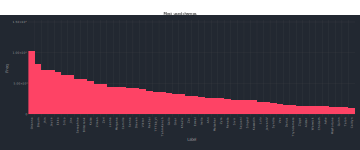

In [31]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :CharacterID, "Most used champs")

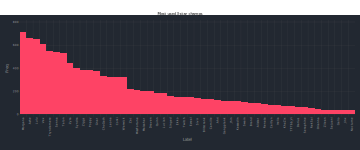

In [32]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.Tier == 3, data)

plot_freq(data, :CharacterID, "Most used 3 star champs")

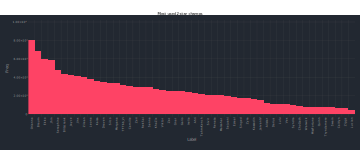

In [33]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.Tier == 2, data)

plot_freq(data, :CharacterID, "Most used 2 star champs")

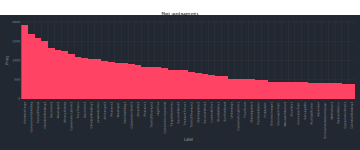

In [34]:
data = innerjoin(rd.augments, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :Augment, "Most used augments")

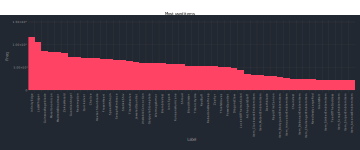

In [35]:
data = innerjoin(rd.items, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :Item, "Most used items")

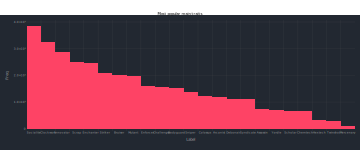

In [36]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierCurrent >= r.TierTotal/2 && r.TierTotal > 1, data)

plot_freq(data, :Trait, "Most popular main traits")

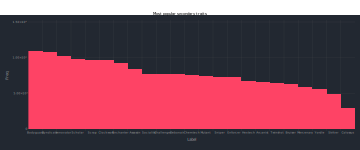

In [37]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierCurrent < r.TierTotal/2 && r.TierTotal > 1, data)

plot_freq(data, :Trait, "Most popular secondary traits")

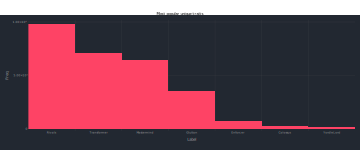

In [38]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierTotal == 1 , data)

plot_freq(data, :Trait, "Most popular unique traits")